The MS Estonia was a car and passenger ferry that was sailing from Estonia to Sweden with 989 passengers and crew when bad weather and heavy seas caused it to sink off the coast of Finland.

A crew member who survived the accident told the BBC at the time that he had seen a loading bay door open and taking in water minutes before the ship sank.

People from 17 countries lost their lives in the disaster. Of the 852 people killed, 501 were Swedish and 285 were Estonian.

The Estonia disaster is the second-deadliest peacetime sinking of a European ship after the Titanic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("Downloads\datasets_800154_1372289_estonia-passenger-list.csv")

In [3]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
data_copy=data.copy()

In [5]:
data.drop("PassengerId",axis=1,inplace=True)

In [6]:
data.shape

(989, 7)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

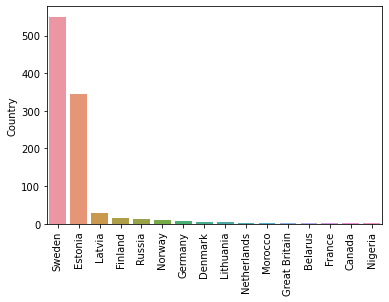

In [7]:
sb.barplot(data["Country"].value_counts().index,data["Country"].value_counts())
plt.xticks(rotation=90)

most of the passengers were from Sweden and Estonia

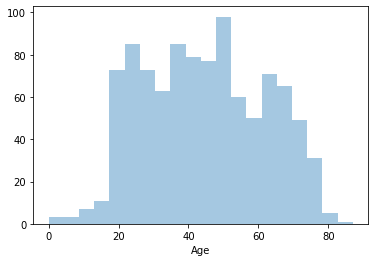

In [8]:
sb.distplot(data["Age"],kde=None,bins=20)

most of the passengers were from age group 18 to 75

In [9]:
data["Survived"].value_counts()

0    852
1    137
Name: Survived, dtype: int64

no. of casualties hits 852 in this Estonia ferry disaster

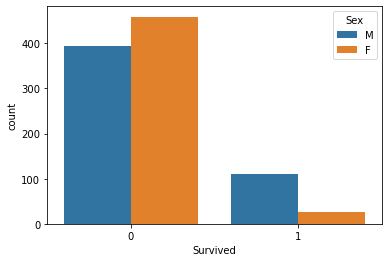

In [10]:
sb.countplot(data["Survived"],hue=data["Sex"])

deaths of male and female are almost equal,however female exceeds male in death count.

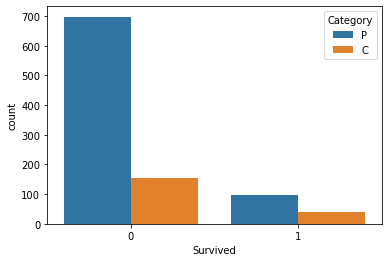

In [11]:
sb.countplot(data["Survived"],hue=data["Category"])

most of the deaths are from passenger category P

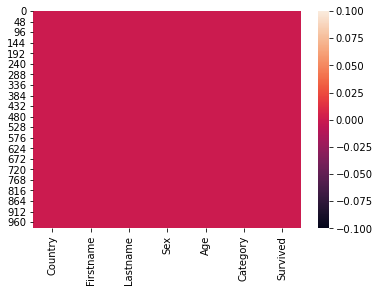

In [12]:
sb.heatmap(pd.isnull(data))

In [13]:
data.drop(["Country","Firstname","Lastname","Sex"],axis=1,inplace=True)

In [14]:
data=pd.get_dummies(data)

In [15]:
data.head()

,Age,Survived,Category_C,Category_P
0,62,0,0,1
1,22,0,1,0
2,21,0,1,0
3,53,0,1,0
4,55,0,0,1


In [16]:
x=data[["Category_C","Category_P"]].values

In [17]:
y=data["Survived"].values.reshape(-1,1)

In [18]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
classifier=RandomForestClassifier(n_estimators=100)

In [29]:
classifier.fit(x_train,y_train)

<ipython-input-29-b827a6aea6de>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


RandomForestClassifier()

In [30]:
y_predict=classifier.predict(x_test)

In [31]:
from sklearn import metrics

In [32]:
print(metrics.accuracy_score(y_test,y_predict))

0.8838383838383839
